# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Imports
import cv2
import pickle
import random
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from IPython.display import display
from IPython.display import Image as dispImage
from PIL import Image
from sklearn.cross_validation import train_test_split
from sklearn.utils import shuffle
from tensorflow.contrib.layers import flatten

# Import training.p and test.p files
training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

# Split for train/validation data
X_train, X_validation, y_train, y_validation = train_test_split(train['features'], train['labels'], train_size = 0.8)

X_test, y_test = test['features'], test['labels']

/home/carnd/anaconda3/envs/CarND-Traffic-Sign-Classifier-Project/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
# Number of training examples
n_train = X_train.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# Shape of an traffic sign image.
image_shape = (X_train.shape[1],X_train.shape[2])

# Number of nique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

# Display information
print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 31367
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

(32, 32, 3)
13


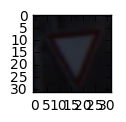

In [3]:
# Data exploration visualization
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index]
print(image.shape)
plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[index])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [4]:
# Preprocessing image set
def preprocess_set(img):
    
    img_gr = grayscale_set(img)
    img_nm = normalize_set(img_gr)
    img_p = np.expand_dims(img_nm, axis=3)
    
    return img_p
    
# Grayscale image set
def grayscale_set(img):
    img_gr = []
    
    for i in range(0,len(img)):
        img_gr.append(cv2.cvtColor(img[i],cv2.COLOR_BGR2GRAY))

    return img_gr

# Normalize image set (values between 0-1)
def normalize_set(img):
    grayscale_max = 255
    img_nm = []
    
    for i in range(0,len(img)):
        img_nm.append(img[i]/grayscale_max)
    
    return img_nm

# Resize single image (as necessary)
def resize_img(img):
    return cv2.resize(img,(32,32))

In [5]:
# Shuffle training image set
X_train, y_train = shuffle(X_train, y_train)

In [6]:
# Proprocess training, test, validation image sets
X_train = preprocess_set(X_train)
X_test = preprocess_set(X_test)
X_validation = preprocess_set(X_validation)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

-If necessary, for new images for examples, I first resize the images to be 32x32. 
-I then reduce the colored RGB images to grayscale, because here color is not important to classify signs. 
-I then normalize the grayscaled images so that the value for each pixel is between 0-1. It will take us less processing power.

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

-I used 80% of the training set images to set up the training set. And used 20% of the training set images to set up the validation set. I used the testing set images to set up the testing set.
-I shuffled the images in the training set. 

In [7]:
# Hyperparameters
EPOCHS = 150
BATCH_SIZE = 32
mu = 0
sigma = 0.1
inc1_depth = 12
inc2_depth = 24
l2_rate = 0.01
alpha = 0.01
epsilon = 1e-3
rate = 10e-5
dropout = 0.5

In [8]:
# CNN net definition
def net(x):    
    #Inception 1 and 2 variable
    inc1_depth_reduced = int(inc1_depth/2)
    inc2_depth_reduced = int(inc2_depth/2)
    
    # Layer 1: Inception Module 1. Input = 32x32x1. Output = 32x32x(4*inc1_depth).
    
    # 1x1 Convolution 1. Input = 32x32x1. Output = 32x32x(inc1_depth).
    inc1_1x1_conv1_W = tf.Variable(tf.truncated_normal(shape=(1, 1, 1, inc1_depth), mean = mu, stddev = sigma))
    inc1_1x1_conv1_b = tf.Variable(tf.zeros(inc1_depth))
    inc1_1x1_conv1 = tf.nn.conv2d(x, inc1_1x1_conv1_W, strides=[1,1,1,1], padding='SAME') + inc1_1x1_conv1_b
    
    # 1x1 Convolution 2 (will be followed by 3x3 convolution). Input = 32x32x1. Output = 32x32xinc1_depth_reduced.
    inc1_1x1_conv2_W = tf.Variable(tf.truncated_normal(shape=(1, 1, 1, inc1_depth_reduced), mean = mu, stddev = sigma))
    inc1_1x1_conv2_b = tf.Variable(tf.zeros(inc1_depth_reduced))
    inc1_1x1_conv2 = tf.nn.conv2d(x, inc1_1x1_conv2_W, strides=[1,1,1,1], padding='SAME') + inc1_1x1_conv2_b
    
    # 1x1 Convolution 3 (will be followed by 5x5 convolution). Input = 32x32x1. Output = 32x32xinc1_depth_reduced.
    inc1_1x1_conv3_W = tf.Variable(tf.truncated_normal(shape=(1, 1, 1, inc1_depth_reduced), mean = mu, stddev = sigma))
    inc1_1x1_conv3_b = tf.Variable(tf.zeros(inc1_depth_reduced))
    inc1_1x1_conv3 = tf.nn.conv2d(x, inc1_1x1_conv3_W, strides=[1,1,1,1], padding='SAME') + inc1_1x1_conv3_b
    
    # 3x3 Convolution. Input = 32x32xinc1_depth_reduced. Output = 32x32x(inc1_depth).
    inc1_3x3_W = tf.Variable(tf.truncated_normal(shape=(3, 3, inc1_depth_reduced, inc1_depth), mean = mu, stddev = sigma))
    inc1_3x3_b = tf.Variable(tf.zeros(inc1_depth))
    inc1_3x3 = tf.nn.conv2d(inc1_1x1_conv2, inc1_3x3_W, strides=[1,1,1,1], padding='SAME') + inc1_3x3_b
    
    # 5x5 Convolution. Input = 32x32xinc1_depth_reduced. Output = 32x32x(inc1_depth).
    inc1_5x5_W = tf.Variable(tf.truncated_normal(shape=(5, 5, inc1_depth_reduced, inc1_depth), mean = mu, stddev = sigma))
    inc1_5x5_b = tf.Variable(tf.zeros(inc1_depth))
    inc1_5x5 = tf.nn.conv2d(inc1_1x1_conv3, inc1_5x5_W, strides=[1,1,1,1], padding='SAME') + inc1_5x5_b
    
    # Pooling (will be followed by 1x1 convolution). Input = 32x32x1. Output = 32x32x1.
    inc1_pool = tf.nn.avg_pool(x, ksize=[1, 2, 2, 1], strides=[1, 1, 1, 1], padding='SAME')
    # 1x1 Convolution 4. Input = 32x32x1. Output = 32x32x(inc1_depth).
    inc1_1x1_conv4_W = tf.Variable(tf.truncated_normal(shape=(1, 1, 1, inc1_depth), mean = mu, stddev = sigma))
    inc1_1x1_conv4_b = tf.Variable(tf.zeros(inc1_depth))
    inc1_1x1_conv4 = tf.nn.conv2d(inc1_pool, inc1_1x1_conv4_W, strides=[1,1,1,1], padding='SAME') + inc1_1x1_conv4_b
        
    # Concatenate. Input = 32x32x(inc1_depth). Output = 32x32x(4*inc1_depth).
    inc1 = tf.concat(3,[inc1_1x1_conv1,inc1_3x3,inc1_5x5,inc1_1x1_conv4])
    
    #ONLY DURING TRAINING
    # Batch normalization. (ref.https://arxiv.org/pdf/1502.03167v3.pdf) 
    batch_mean1, batch_var1 = tf.nn.moments(inc1,[0])
    inc1_BN = (inc1 - batch_mean1) / tf.sqrt(batch_var1 + epsilon)
    inc1_BN_scale = tf.Variable(tf.ones([(4*inc1_depth)]))
    inc1_BN_shift = tf.Variable(tf.zeros([(4*inc1_depth)]))
    inc1 = inc1_BN_scale * inc1_BN + inc1_BN_shift
    
    # Activation.
    inc1 = tf.nn.relu(inc1)
    inc1 = tf.maximum(alpha*inc1,inc1)     
    
    # Layer 2: Inception Module 2. Input = 32x32x(inc1_depth). Output = 32x32x(4*inc2_depth).
    
    # 1x1 Convolution 1. Input = 32x32x(4*inc1_depth). Output = 32x32x(inc2_depth).
    inc2_1x1_conv1_W = tf.Variable(tf.truncated_normal(shape=(1, 1, 4*inc1_depth, inc2_depth), mean = mu, stddev = sigma))
    inc2_1x1_conv1_b = tf.Variable(tf.zeros(inc2_depth))
    inc2_1x1_conv1 = tf.nn.conv2d(inc1, inc2_1x1_conv1_W, strides=[1,1,1,1], padding='SAME') + inc2_1x1_conv1_b
    
    # 1x1 Convolution 2 (will be followed by 3x3 convolution). Input = 32x32x(4*inc1_depth). Output = 32x32xinc2_depth_reduced.
    inc2_1x1_conv2_W = tf.Variable(tf.truncated_normal(shape=(1, 1, 4*inc1_depth, inc2_depth_reduced), mean = mu, stddev = sigma))
    inc2_1x1_conv2_b = tf.Variable(tf.zeros(inc2_depth_reduced))
    inc2_1x1_conv2 = tf.nn.conv2d(inc1, inc2_1x1_conv2_W, strides=[1,1,1,1], padding='SAME') + inc2_1x1_conv2_b
    
    # 1x1 Convolution 3 (will be followed by 5x5 convolution). Input = 32x32x(4*inc1_depth). Output = 32x32xinc2_depth_reduced.
    inc2_1x1_conv3_W = tf.Variable(tf.truncated_normal(shape=(1, 1, 4*inc1_depth, inc2_depth_reduced), mean = mu, stddev = sigma))
    inc2_1x1_conv3_b = tf.Variable(tf.zeros(inc2_depth_reduced))
    inc2_1x1_conv3 = tf.nn.conv2d(inc1, inc2_1x1_conv3_W, strides=[1,1,1,1], padding='SAME') + inc2_1x1_conv3_b
    
    # 3x3 Convolution. Input = 32x32xinc2_depth_reduced. Output = 32x32x(inc2_depth).
    inc2_3x3_W = tf.Variable(tf.truncated_normal(shape=(3, 3, inc2_depth_reduced, inc2_depth), mean = mu, stddev = sigma))
    inc2_3x3_b = tf.Variable(tf.zeros(inc2_depth))
    inc2_3x3 = tf.nn.conv2d(inc2_1x1_conv2, inc2_3x3_W, strides=[1,1,1,1], padding='SAME') + inc2_3x3_b
    
    # 5x5 Convolution. Input = 32x32xinc2_depth_reduced. Output = 32x32x(inc2_depth).
    inc2_5x5_W = tf.Variable(tf.truncated_normal(shape=(5, 5, inc2_depth_reduced, inc2_depth), mean = mu, stddev = sigma))
    inc2_5x5_b = tf.Variable(tf.zeros(inc2_depth))
    inc2_5x5 = tf.nn.conv2d(inc2_1x1_conv3, inc2_5x5_W, strides=[1,1,1,1], padding='SAME') + inc2_5x5_b
    
    # Pooling (will be followed by 1x1 convolution). Input = 32x32x(4*inc1_depth). Output = 32x32x(inc1_depth).
    inc2_pool = tf.nn.avg_pool(inc1, ksize=[1, 2, 2, 1], strides=[1, 1, 1, 1], padding='SAME')
    # 1x1 Convolution 4. Input = 32x32x(4*inc1_depth). Output = 32x32x(inc2_depth).
    inc2_1x1_conv4_W = tf.Variable(tf.truncated_normal(shape=(1, 1, 4*inc1_depth, inc2_depth), mean = mu, stddev = sigma))
    inc2_1x1_conv4_b = tf.Variable(tf.zeros(inc2_depth))
    inc2_1x1_conv4 = tf.nn.conv2d(inc2_pool, inc2_1x1_conv4_W, strides=[1,1,1,1], padding='SAME') + inc2_1x1_conv4_b
        
    # Concatenate. Input = 32x32x(inc2_depth). Output = 32x32x(4*inc2_depth).
    inc2 = tf.concat(3,[inc2_1x1_conv1,inc2_3x3,inc2_5x5,inc2_1x1_conv4])
    
    #ONLY DURING TRAINING
    # Batch normalization. (ref.https://arxiv.org/pdf/1502.03167v3.pdf) 
    batch_mean2, batch_var2 = tf.nn.moments(inc2,[0])
    inc2_BN = (inc2 - batch_mean2) / tf.sqrt(batch_var2 + epsilon)
    inc2_BN_scale = tf.Variable(tf.ones([(4*inc2_depth)]))
    inc2_BN_shift = tf.Variable(tf.zeros([(4*inc2_depth)]))
    inc2 = inc2_BN_scale * inc2_BN + inc2_BN_shift
    
    # Activation.
    inc2 = tf.nn.relu(inc2)
    inc2 = tf.maximum(alpha*inc2,inc2)  
        
    # Dropout. 
    inc2 = tf.nn.dropout(inc2, keep_prob)
    
    # Flatten. Input = 32x32x(4*inc2_depth). Output = 32*32*(4*inc2_depth).
    fc0   = flatten(inc2)
    
    # Layer 3: Fully Connected. Input = 32*32*(4*inc2_depth). Output = 1024.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(32*32*(4*inc2_depth), 1024), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(1024))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)
    fc1    = tf.maximum(alpha*fc1,fc1)  

    # Layer 4: Fully Connected. Input = 1024. Output = 512.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(1024, 512), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(512))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)
    fc2    = tf.maximum(alpha*fc2,fc2)  

    # Layer 5: Fully Connected. Input = 512. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(512, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    #L2_loss.
    l2_loss = (l2_rate*tf.nn.l2_loss(inc1_1x1_conv1_W) +
    l2_rate*tf.nn.l2_loss(inc1_1x1_conv1_b) +
    l2_rate*tf.nn.l2_loss(inc1_1x1_conv2_W) +    
    l2_rate*tf.nn.l2_loss(inc1_1x1_conv2_b) +
    l2_rate*tf.nn.l2_loss(inc1_1x1_conv3_W) +    
    l2_rate*tf.nn.l2_loss(inc1_1x1_conv3_b) +
    l2_rate*tf.nn.l2_loss(inc1_3x3_W) +
    l2_rate*tf.nn.l2_loss(inc1_3x3_b) +
    l2_rate*tf.nn.l2_loss(inc1_5x5_W) +
    l2_rate*tf.nn.l2_loss(inc1_5x5_b) +
    l2_rate*tf.nn.l2_loss(inc1_1x1_conv4_W) +
    l2_rate*tf.nn.l2_loss(inc1_1x1_conv4_b) +
    l2_rate*tf.nn.l2_loss(inc2_1x1_conv1_W) +
    l2_rate*tf.nn.l2_loss(inc2_1x1_conv1_b) +
    l2_rate*tf.nn.l2_loss(inc2_1x1_conv2_W) +    
    l2_rate*tf.nn.l2_loss(inc2_1x1_conv2_b) +
    l2_rate*tf.nn.l2_loss(inc2_1x1_conv3_W) +    
    l2_rate*tf.nn.l2_loss(inc2_1x1_conv3_b) +
    l2_rate*tf.nn.l2_loss(inc2_3x3_W) +
    l2_rate*tf.nn.l2_loss(inc2_3x3_b) +
    l2_rate*tf.nn.l2_loss(inc2_5x5_W) +
    l2_rate*tf.nn.l2_loss(inc2_5x5_b) +
    l2_rate*tf.nn.l2_loss(inc2_1x1_conv4_W) +
    l2_rate*tf.nn.l2_loss(inc2_1x1_conv4_b) +
    l2_rate*tf.nn.l2_loss(fc1_W) +
    l2_rate*tf.nn.l2_loss(fc1_b) +  
    l2_rate*tf.nn.l2_loss(fc2_W) +
    l2_rate*tf.nn.l2_loss(fc2_b) +  
    l2_rate*tf.nn.l2_loss(fc3_W) +
    l2_rate*tf.nn.l2_loss(fc3_b))
    
    return logits,l2_loss

In [9]:
# CNN Tensorflow variables
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
keep_prob = tf.placeholder(tf.float32)

# CNN full model
logits,l2_loss = net(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss = tf.reduce_mean(cross_entropy) + l2_loss
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss)

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

The final architecture is as follow:

-LOGITS:

Layer 1: Inception Module 1. Input = 32x32x1. Output = 32x32x(4*inc1_depth).
    1x1 Convolution 1. Input = 32x32x1. Output = 32x32x(inc1_depth).
    1x1 Convolution 2 (will be followed by 3x3 convolution). Input = 32x32x1. Output = 32x32xinc1_depth_reduced.
    3x3 Convolution. Input = 32x32xinc1_depth_reduced. Output = 32x32x(inc1_depth).
    1x1 Convolution 3 (will be followed by 5x5 convolution). Input = 32x32x1. Output = 32x32xinc1_depth_reduced.
    5x5 Convolution. Input = 32x32xinc1_depth_reduced. Output = 32x32x(inc1_depth).
    Pooling (will be followed by 1x1 convolution). Input = 32x32x1. Output = 32x32x1.
    1x1 Convolution 4. Input = 32x32x1. Output = 32x32x(inc1_depth). 
    Concatenate. Input = 32x32x(inc1_depth). Output = 32x32x(4*inc1_depth).
    Batch normalization.
    Activation.
   
Layer 2: Inception Module 2. Input = 32x32x(inc1_depth). Output = 32x32x(4*inc2_depth).
    1x1 Convolution 1. Input = 32x32x(4*inc1_depth). Output = 32x32x(inc2_depth).
    1x1 Convolution 2 (will be followed by 3x3 convolution). Input = 32x32x(4*inc1_depth). Output = 32x32xinc2_depth_reduced.
    3x3 Convolution. Input = 32x32xinc2_depth_reduced. Output = 32x32x(inc2_depth).
    1x1 Convolution 3 (will be followed by 5x5 convolution). Input = 32x32x(4*inc1_depth). Output = 32x32xinc2_depth_reduced.
    5x5 Convolution. Input = 32x32xinc2_depth_reduced. Output = 32x32x(inc2_depth).
    Pooling (will be followed by 1x1 convolution). Input = 32x32x(4*inc1_depth). Output = 32x32x(inc1_depth).
    1x1 Convolution 4. Input = 32x32x(4*inc1_depth). Output = 32x32x(inc2_depth).
    Concatenate. Input = 32x32x(inc2_depth). Output = 32x32x(4*inc2_depth).
    Batch normalization.
    Leaky Relu Activation.
    Dropout.   
    Flatten. Input = 32x32x(4*inc2_depth). Output = 32*32*(4*inc2_depth).
    
Layer 3: Fully Connected. Input = 32*32*(4*inc2_depth). Output = 1024.
    Leaky Relu Activation.
    
Layer 4: Fully Connected. Input = 1024. Output = 512.
    Leaky Relu Activation. 
    
Layer 5: Fully Connected. Input = 512. Output = 43.

-Cross entropy/Softmax

-Reduce loss + L2 loss

-Adam Optimizer


In [10]:
# CNN Training set up

# Tensorflow variables
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

# Evaluate definition
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: dropout})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [11]:
# CNN Training implementation and validation
with tf.Session() as sess:
    
    #SELECT Restore variables
    #saver.restore(sess, tf.train.latest_checkpoint('.'))
    #OR SELECT Initialize variables
    sess.run(tf.global_variables_initializer())
    
    num_examples = len(X_train)
    
    print("Training...")
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: dropout})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        
    saver.save(sess, 'net')
    print("Model saved")

Training...
EPOCH 1 ...
Validation Accuracy = 0.108
EPOCH 2 ...
Validation Accuracy = 0.246
EPOCH 3 ...
Validation Accuracy = 0.441
EPOCH 4 ...
Validation Accuracy = 0.602
EPOCH 5 ...
Validation Accuracy = 0.774
EPOCH 6 ...
Validation Accuracy = 0.843
EPOCH 7 ...
Validation Accuracy = 0.883
EPOCH 8 ...
Validation Accuracy = 0.862
EPOCH 9 ...
Validation Accuracy = 0.900
EPOCH 10 ...
Validation Accuracy = 0.905
EPOCH 11 ...
Validation Accuracy = 0.908
EPOCH 12 ...
Validation Accuracy = 0.918
EPOCH 13 ...
Validation Accuracy = 0.929
EPOCH 14 ...
Validation Accuracy = 0.927
EPOCH 15 ...
Validation Accuracy = 0.904
EPOCH 16 ...
Validation Accuracy = 0.925
EPOCH 17 ...
Validation Accuracy = 0.930
EPOCH 18 ...
Validation Accuracy = 0.928
EPOCH 19 ...
Validation Accuracy = 0.940
EPOCH 20 ...
Validation Accuracy = 0.938
EPOCH 21 ...
Validation Accuracy = 0.939
EPOCH 22 ...
Validation Accuracy = 0.953
EPOCH 23 ...
Validation Accuracy = 0.949
EPOCH 24 ...
Validation Accuracy = 0.954
EPOCH 25 ...


In [12]:
# CNN Test evaluation
with tf.Session() as sess:
    netTestSaver = tf.train.import_meta_graph('net.meta')
    netTestSaver.restore(sess, tf.train.latest_checkpoint('.'))
    
    print("Test Evaluation...")
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Evaluation...
Test Accuracy = 0.916


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**
I have trained the model using the following:
-preprocessing: grayscale and normalize inputs
-optimizer: Adam
-batch size: 32
-epochs: 150
-hyperparameters:
	-mu: 0
	-sigma: 0.1
	-inc1_depth: 12
	-inc2_depth: 24
	-l2_rate: 0.01
	-alpha: 0.01
	-epsilon: 1e-3
	-rate: 10e-5
	-dropout: 0.5
-pooling: average pooling / dropout
-activation: leaky relu

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
Through trial and error, and through reading papers available online about deep neural network, I was able to implement improvements. Each steps are listed as follow:

Without improvement to LeNet:
>Validation Accuracy ~= 0.957

First:
-increased epoche from 10 to 100
>Validation Accuracy ~= 0.965

Second:
-Is color important to classify signs? No, thus we can average rgb and use grayscale. It should require less processing power.
>Validation Accuracy ~=  0.967

Third:
-Can we use better regulariser than MaxPooling? Yes, use dropout in addition to maxpooling. Because maxpooling discards only max values, dropout discard more variety of values.
-Using epoch  = 100
>Validation Accuracy ~=  0.959

Fourth: Improvement to using single convolution per layer? Yes. Using inception module. By concatenation of the outputs for a,b,c: a) Average pooling ->  1x1convolution - b) 1x1 -> 3x3 convolution c) 1x1 -> 5x5 convolution (adjustable 3X3, 5x5 parameters)
-Using epoch = 20
>Validation Accuracy ~=  0.966

Fifth:
-Change optimizer from adamoptimizer to adagrad
-Using epoch = 100
>EPOCH 663 ... Validation Accuracy = 0.908

Fifth-2:
-Change optimizer from adagrad back to adam (because lower validation accuracy)

Sixth: 
-Add L2 regularization to improve handling of new data
-Change activation function from Relu to  Leaky Relu. (note: Maxout (generalized form of Relu and leaky Relu, but double number of parameters))
-Decrease depth to inc1_depth = 6, inc2_depth = 16
>EPOCH 12 ... Validation Accuracy = 0.924

Sixth-2:
-Using epoch = 10000
>EPOCH 20 ... Validation Accuracy = 0.934

Seventh: 
-Add Batch normalization
>EPOCH 164 ... Validation Accuracy = 0.974

Eighth:
Adjust hyperparameters (batch size, epoch, weight initialisation, ...)
-Increase inception module depth to inc1_depth = 12 and inc2_depth = 24
>EPOCH 19 ... Validation Accuracy = 0.917

-Increase learning rate from rate = 0.001 to rate = 10e-5
>EPOCH 185 ... Validation Accuracy = 0.986

-Reduce epoch to 250
-Decrease the batch size from BATCH_SIZE = 128 to BATCH_SIZE = 64
>EPOCH 201 ... Validation Accuracy = 0.982
>EPOCH 250 ... Validation Accuracy = 0.976
>>Test Accuracy = 0.921

-Reduce epoch to 100
-normalize grayscaled image set
-Decrease the batch size from BATCH_SIZE = 64 to BATCH_SIZE = 16
>EPOCH 100 ... Validation Accuracy = 0.955 (too long)

-Increase epoch to 150
-Increase the batch size from BATCH_SIZE = 16 to BATCH_SIZE = 32
>EPOCH 150 ... Validation Accuracy = 0.972

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [13]:
# Load and plot new images
# First image:
image_source1 = 'sign1.jpg'
image1 = mpimg.imread(image_source1)

# Second image:
image_source2 = 'sign2.jpg'
image2 = mpimg.imread(image_source2)

# Third image:
image_source3 = 'sign3.jpg'
image3 = mpimg.imread(image_source3)

# Fourth image:
image_source4 = 'sign4.jpg'
image4 = mpimg.imread(image_source4)

# Fifth image:
image_source5 = 'sign5.jpeg'
image5 = mpimg.imread(image_source5)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

Those images are traffic signs from france. They have slight differences, using french wording, and may have difference line width within the sign. The 5 additionnal signs that are added are displayed below. 

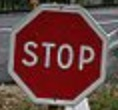

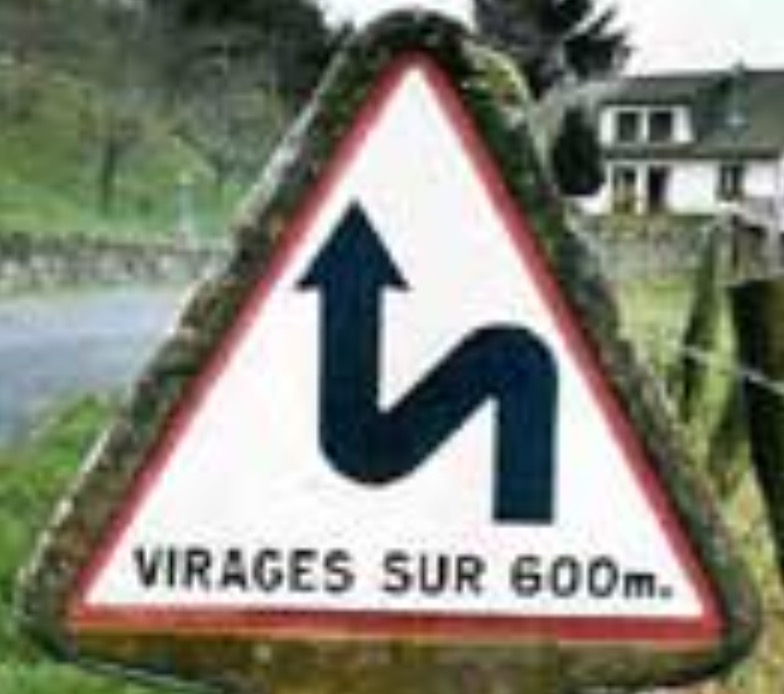

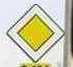

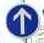

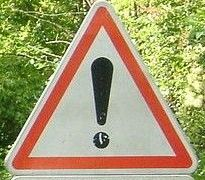

In [14]:
# Display new images
display(dispImage(image_source1, width=64, height=64),
        dispImage(image_source2, width=64, height=64), 
        dispImage(image_source3, width=64, height=64), 
        dispImage(image_source4, width=64, height=64), 
        dispImage(image_source5, width=64, height=64))

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In the order as displayed above, the 5 signs are of classification 14, 21, 12, 35, and 18.
In the same order, the prediction on the new images are as follow: 14, 40, 2, 35, and 18.

We get 3/5 signs correct. Which gives us 60% accurate.

Visualization for the softmax probabilities:

TopKV2(values=array([[ 0.50982499,  0.23533119,  0.10260323,  0.07671275,  0.01788689],
       [ 0.34475332,  0.33654815,  0.09876439,  0.06091563,  0.03724382],
       [ 0.42445007,  0.14939374,  0.12629692,  0.11914383,  0.03966985],
       [ 0.92313105,  0.03067406,  0.02649627,  0.00624807,  0.00481103],
       [ 0.89043903,  0.02778345,  0.02754965,  0.02421673,  0.01338637]], dtype=float32), indices=array([[14, 36, 28,  8,  7],
       [40, 21,  7, 12, 11],
       [ 2, 12,  5,  7,  9],
       [35,  3, 36, 28, 29],
       [18, 27, 11, 24, 37]], dtype=int32))

In [15]:
# Predictions for new images

# Set up new images classification
new_y_img = np.stack([14,21,12,35,18])

# Set up new images data set
new_X_img = np.empty((0,32,32,3))
new_X_img = np.append(new_X_img, np.expand_dims(resize_img(image1), axis=0),axis=0)
new_X_img = np.append(new_X_img, np.expand_dims(resize_img(image2), axis=0),axis=0)
new_X_img = np.append(new_X_img, np.expand_dims(resize_img(image3), axis=0),axis=0)
new_X_img = np.append(new_X_img, np.expand_dims(resize_img(image4), axis=0),axis=0)
new_X_img = np.append(new_X_img, np.expand_dims(resize_img(image5), axis=0),axis=0)
new_X_img = new_X_img.astype(np.uint8)

# Prepocess new images data set
new_X_img = preprocess_set(new_X_img)

In [16]:
# Predict accuracy on new images data set
with tf.Session() as sess:
    netNewSaver = tf.train.import_meta_graph('net.meta')
    netNewSaver.restore(sess, tf.train.latest_checkpoint('.'))

    img_pred = sess.run(tf.nn.top_k(tf.nn.softmax(logits), k=5), 
                        feed_dict={x: new_X_img, keep_prob: 1})

print(img_pred)   

TopKV2(values=array([[ 0.50982499,  0.23533119,  0.10260323,  0.07671275,  0.01788689],
       [ 0.34475332,  0.33654815,  0.09876439,  0.06091563,  0.03724382],
       [ 0.42445007,  0.14939374,  0.12629692,  0.11914383,  0.03966985],
       [ 0.92313105,  0.03067406,  0.02649627,  0.00624807,  0.00481103],
       [ 0.89043903,  0.02778345,  0.02754965,  0.02421673,  0.01338637]], dtype=float32), indices=array([[14, 36, 28,  8,  7],
       [40, 21,  7, 12, 11],
       [ 2, 12,  5,  7,  9],
       [35,  3, 36, 28, 29],
       [18, 27, 11, 24, 37]], dtype=int32))


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

From the 5 added signs, none of the prediction are above 99% accurate. They are therefore all uncertain to a degree. Although for signs 4 and 5, we get 92% and 89% accuracy, which is quite high.
For sign2 (incorrect prediction: 40 (34%) / real classification: 21 (33%)) and sign3 (incorrect prediction: 2 (42%) / real classification: 12 (14%)), the correct predictions do appear as second prediction.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.